In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from typing import Union

import matplotlib as mpl
mpl.rc('image', cmap='gray')


### **Exercise 6.1**

#### **Increasing $sigma$**
Gives more fidelity

In [12]:
def gaussian1DKernel(sigma: float, epsilon: int = None):
    h = epsilon or np.ceil(4 * sigma)
    x = np.arange(-h, h + 1)

    g = np.exp(-(x**2) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    g /= g.sum()
    gx = (-x / sigma**2) * g

    g = g.reshape(-1, 1)
    gx = gx.reshape(-1, 1)
    return g, gx

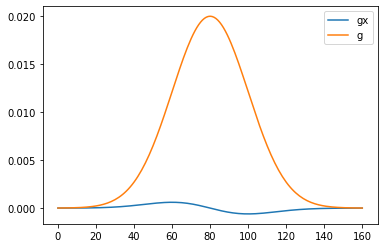

In [13]:
g, gx = gaussian1DKernel(20)
plt.plot(gx)
plt.plot(g)
plt.legend(["gx", "g"])

### **Exercise 6.2**

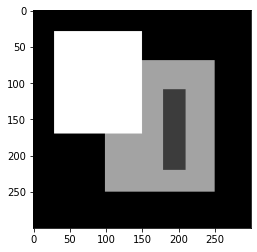

In [14]:
img = cv2.imread("../data/week06_data/TestIm1.png", cv2.IMREAD_GRAYSCALE)/255
plt.imshow(img)

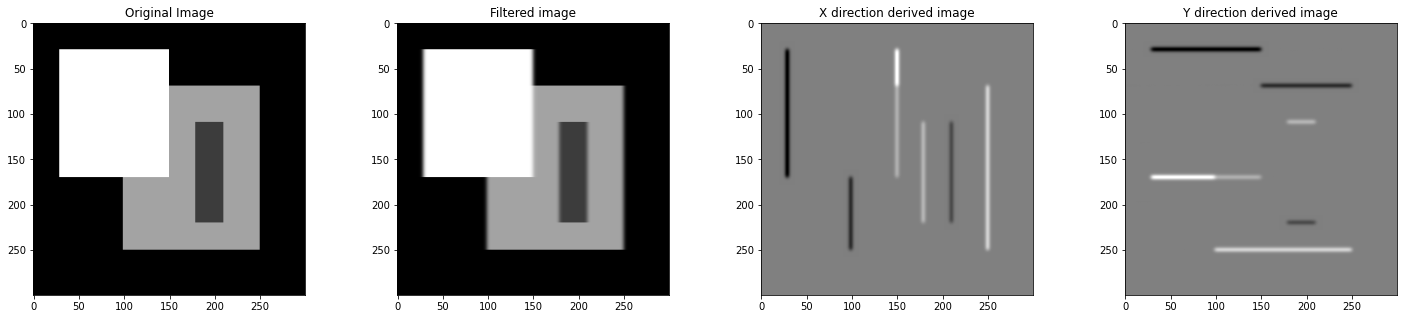

In [15]:
def gaussianSmoothing(img: np.array, sigma: float):
    g, gx = gaussian1DKernel(sigma)
    new_img = cv2.filter2D(img, -1, g)
    new_img = cv2.filter2D(img, -1, g.T)

    gdx = g @ gx.T
    gdy = gx @ g.T

    Ix = cv2.filter2D(img, -1, gdx)
    Iy = cv2.filter2D(img, -1, gdy)

    return new_img, Ix, Iy


I, Ix, Iy = gaussianSmoothing(img, 2)
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(25, 5))
ax1.imshow(img)
ax1.set_title("Original Image")
ax2.imshow(I)
ax2.set_title("Filtered image")
ax3.imshow(Ix)
ax3.set_title("X direction derived image")
ax4.imshow(Iy)
ax4.set_title("Y direction derived image")
plt.show()

### **Exercise 6.3** 
#### Create smoothed hessian

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

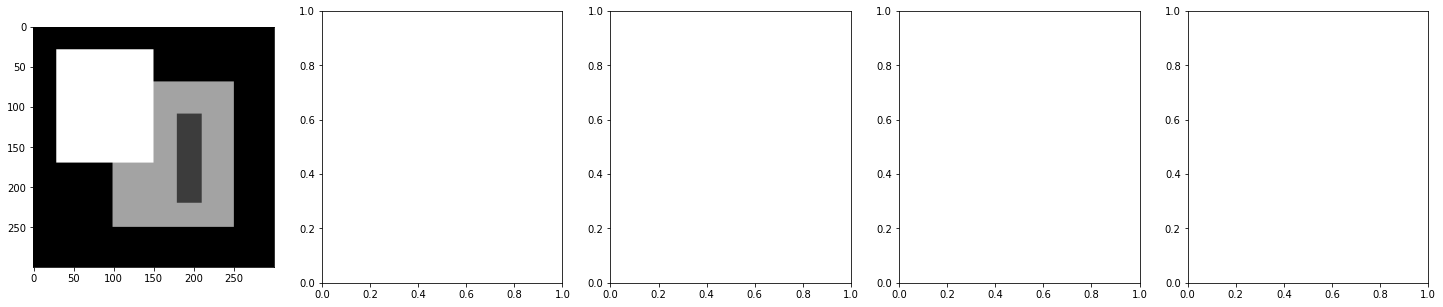

In [16]:
def smoothedHessian(img: np.array, sigma: float, epsilon: int):
    g, gx = gaussian1DKernel(sigma, epsilon=epsilon)
    I, Ix, Iy = gaussianSmoothing(img, sigma)

    Ixx = Ix**2
    Ixy = Ix * Iy
    Iyy = Iy**2

    if not Ixx.shape == Ixy.shape == Iyy.shape:
        print(
            f"Shapes wrong: {Ixx.shape == Ixy.shape == Iyy.shape = }\n{Ixx.shape=}, {Ixy.shape=}, {Iyy.shape=}"
        )

    topleft = cv2.filter2D(cv2.filter2D(Ixx, -1, g), -1, g.T)
    topright = cv2.filter2D(cv2.filter2D(Ixy, -1, g), -1, g.T)
    botleft = cv2.filter2D(cv2.filter2D(Ixy, -1, g), -1, g.T)
    botright = cv2.filter2D(cv2.filter2D(Iyy, -1, g), -1, g.T)

    # print(f"{topleft.shape = }, {topright.shape = }, {botleft.shape = }, {botright.shape = }")

    C = np.array([[topleft, topright], [botleft, botright]])
    C = np.moveaxis(C, [0, 1], [2, 3])
    C = C / C.max()
    return C


sigma = 3
epsilon = 100
C = smoothedHessian(img, sigma, epsilon)

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(1, 5, figsize=(25, 5))
ax0.imshow(img)
ax1.imshow(C[:, :, 0, 0, :])
ax2.imshow(C[:, :, 0, 1, :])
ax3.imshow(C[:, :, 1, 0, :])
ax4.imshow(C[:, :, 1, 1, :])

### **Exercise 6.4**
Create the harris measure

array([[1, 2],
       [3, 4]])